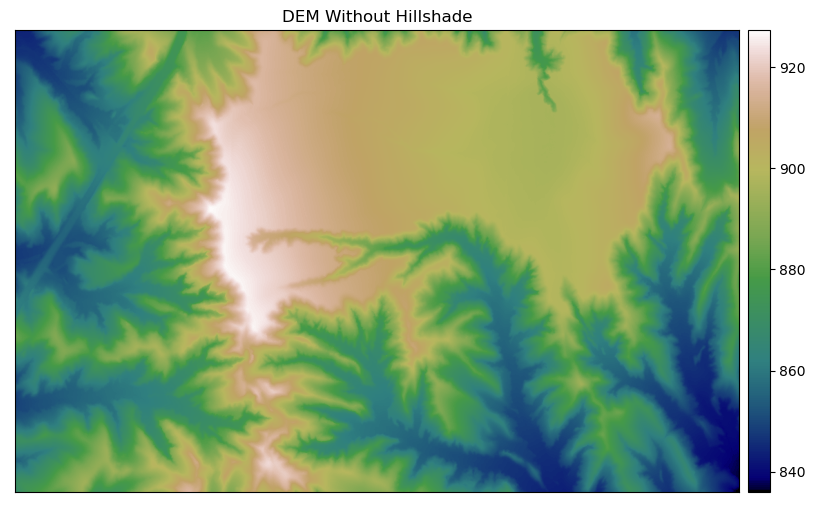

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from rasterio.plot import show
from whitebox import WhiteboxTools
wbt = WhiteboxTools()

dem1 = "table.tif"

# Open the DEM with Rasterio
with rio.open(dem1) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DEM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

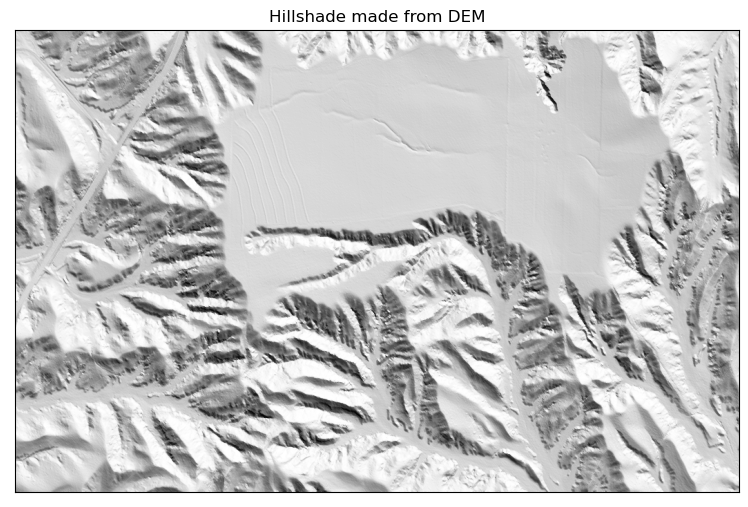

In [2]:
# Create and plot the hillshade with earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DEM",
    figsize=(10, 6),
)
plt.show()

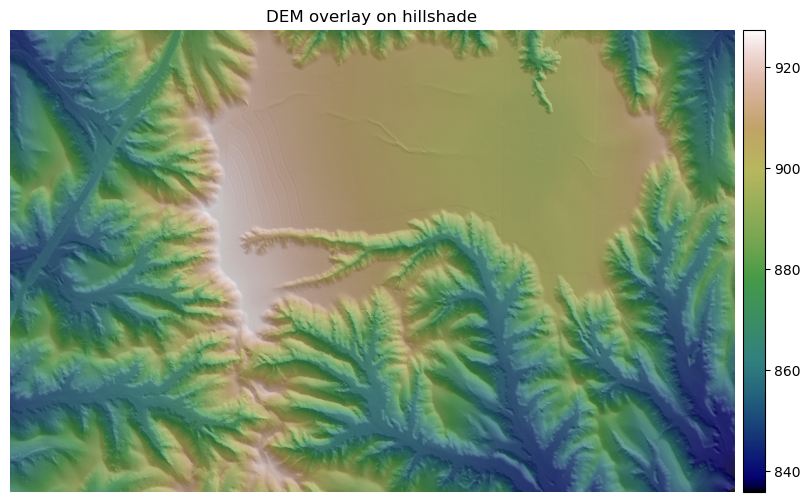

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(elevation, 
              ax=ax, 
              cmap='gist_earth',
              title="DEM overlay on hillshade")

ep.plot_bands(hillshade, 
              cmap='Greys', 
              alpha=0.3, 
              ax=ax, 
              cbar=False)

ax.set_axis_off()

plt.show()


In [12]:
data_dir = './python_terrain_demo/'
print(os.listdir(data_dir))

wbt.set_working_dir(data_dir)
wbt.verbose = False

FileNotFoundError: [WinError 3] The system cannot find the path specified: './Joseph-A-Mason/python_terrain_demo/'

In [9]:
wbt.multidirectional_hillshade(
    dem="table.tif", 
    output="md_hs.tif",
    altitude=30.0, 
    zfactor=2.0, 
    full_mode=False
    )

0

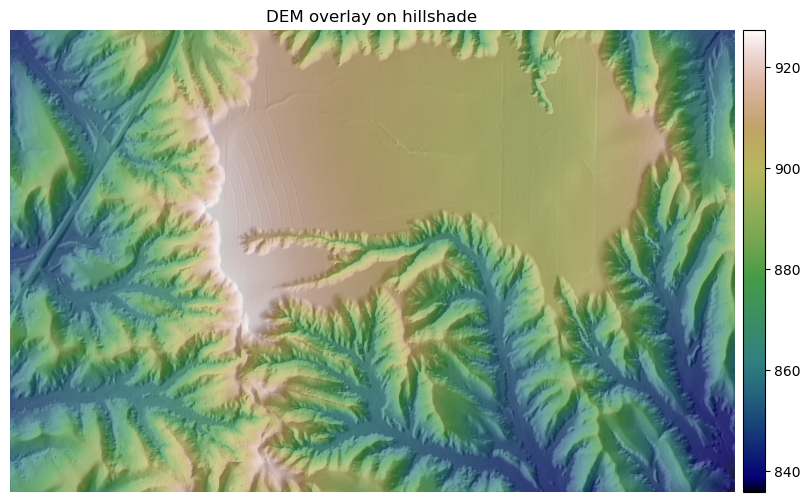

In [10]:
md_hs = rio.open("md_hs.tif")
md_hs2 = md_hs.read()

fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(elevation, 
              ax=ax, 
              cmap='gist_earth',
              title="DEM overlay on hillshade")

ep.plot_bands(md_hs2, 
              cmap='Greys', 
              alpha=0.3, 
              ax=ax, 
              cbar=False)

ax.set_axis_off()

plt.show()

In [ ]:
wbt.slope(
    dem="table.tif", 
    output="table_slp.tif",  
    zfactor=None,
    units="degrees"
)

In [ ]:
slp = rio.open("table_slp.tif")
slp2 = slp.read()
fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(slp2, 
    ax=ax, 
    cmap='seismic',
    title="Slope (Degrees)",
    vmax=45.0)

ep.plot_bands(md_hs2, 
    cmap='Greys', 
    alpha=0.4, 
    ax=ax, 
    cbar=False)

ax.set_axis_off()

plt.show()

In [ ]:
wbt.breach_depressions(
    dem="table.tif", 
    output="table_fill.tif", 
    max_depth=None, 
    max_length=None, 
    flat_increment=None, 
    fill_pits=True,
)

wbt.d_inf_flow_accumulation(
    i="table_fill.tif", 
    output="table_acc.tif", 
    out_type="specific contributing area",  
    threshold=1000, 
    log=False, 
    clip=False, 
    pntr=False, 
)

wbt.extract_streams(
    flow_accum="table_acc.tif", 
    output="table_strm.tif", 
    threshold=1000.0, 
    zero_background=False, 
)

In [ ]:
acc = rio.open("table_acc.tif")
acc2 = acc.read()
fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(acc2, 
    ax=ax, 
    norm=colors.LogNorm(vmin=100.0, vmax=1000),
    cmap='Reds',
    title="Stream Network",
    cbar=False)

ep.plot_bands(md_hs2, 
    cmap='Greys', 
    alpha=0.5, 
    ax=ax, 
    cbar=False)

ax.set_axis_off()

plt.show()